In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("Algerian_forest_fires_dataset.csv")
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


# Exploratory Data Analysis

In [4]:
# Make a copy of the original dataset
df = data
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [5]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [7]:
df.shape

(247, 14)

# Data Cleaning

In [8]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [9]:
# Finding missing values
df[df.isnull().any(axis=1)] 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [10]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [11]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [12]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [13]:
# Remove null or na values rows
df =df.dropna().reset_index(drop=True) 
df.shape

(244, 15)

In [14]:
# Column which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [15]:
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [16]:
#remove 122nd column
df1 = df.drop(122).reset_index(drop=True)
pd.set_option('display.max_rows', None)
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [17]:
df1.shape

(243, 15)

In [18]:
df1[df1.isnull().any(axis=1)] # inorder to check the row which is having the missing values

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [19]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [20]:
# Spaces were fixed in the column names
df1.columns = df1.columns.str.strip()
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

# Changing the data types into the required data types for the respective features for the analysis

In [21]:
df1[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df1[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

In [22]:
objects = [features for features in df1.columns if df1[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        df1[i] = df1[i].astype(float)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [24]:
df1.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


In [25]:
df1.describe(include = 'all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243,243.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131,NaN
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,NaN,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,NaN,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,NaN,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,NaN,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,NaN,2.000000


In [26]:
df1["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [27]:
df1.Classes = df1.Classes.str.strip()

In [28]:
df1["Classes"].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [29]:
df1[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [30]:
df1[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
127,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,2
128,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,fire,2
129,8,6,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire,2
130,9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,not fire,2
131,10,6,2012,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10.0,fire,2


In [31]:
df1.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734


<AxesSubplot:>

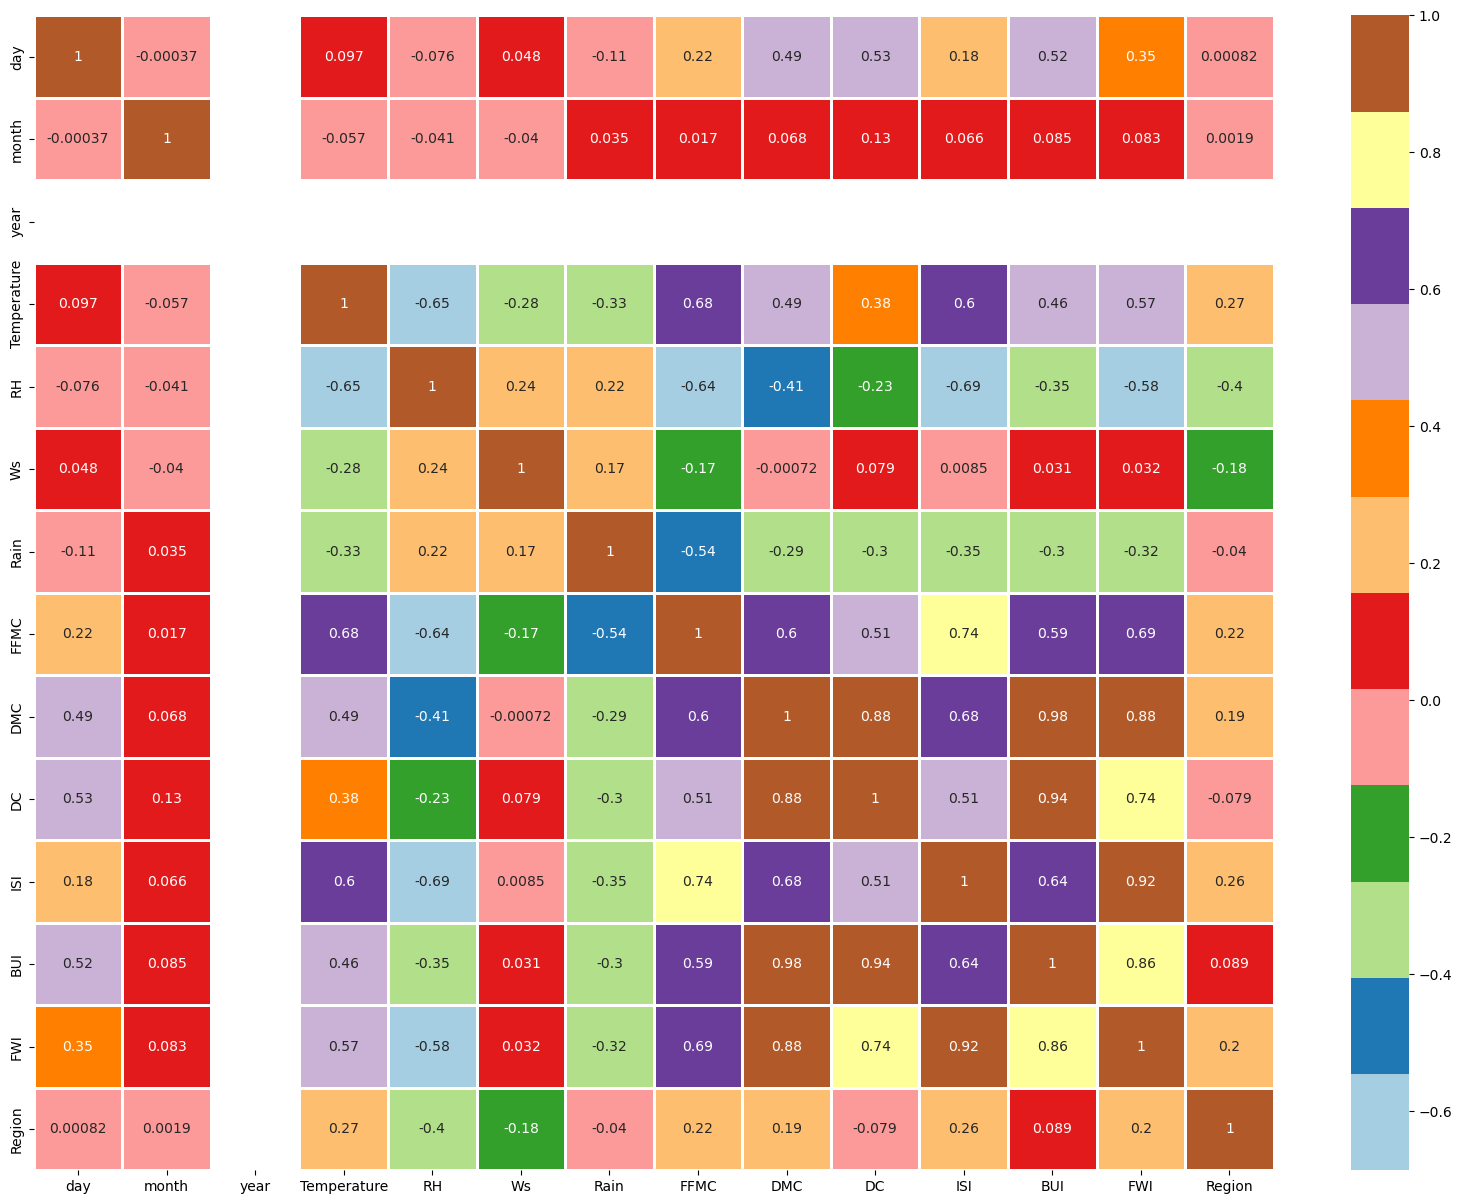

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot= True,linewidths=1, linecolor="white", cbar=True, cmap = "Paired",xticklabels="auto", yticklabels="auto")

In [33]:
df1.shape

(243, 15)

In [34]:
# Encoding Not fire as 0 and Fire as 1
df1['Classes']= df1['Classes'].replace({'not fire':0, 'fire':1})
df1.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


In [35]:
# Check counts
df1.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

<AxesSubplot:>

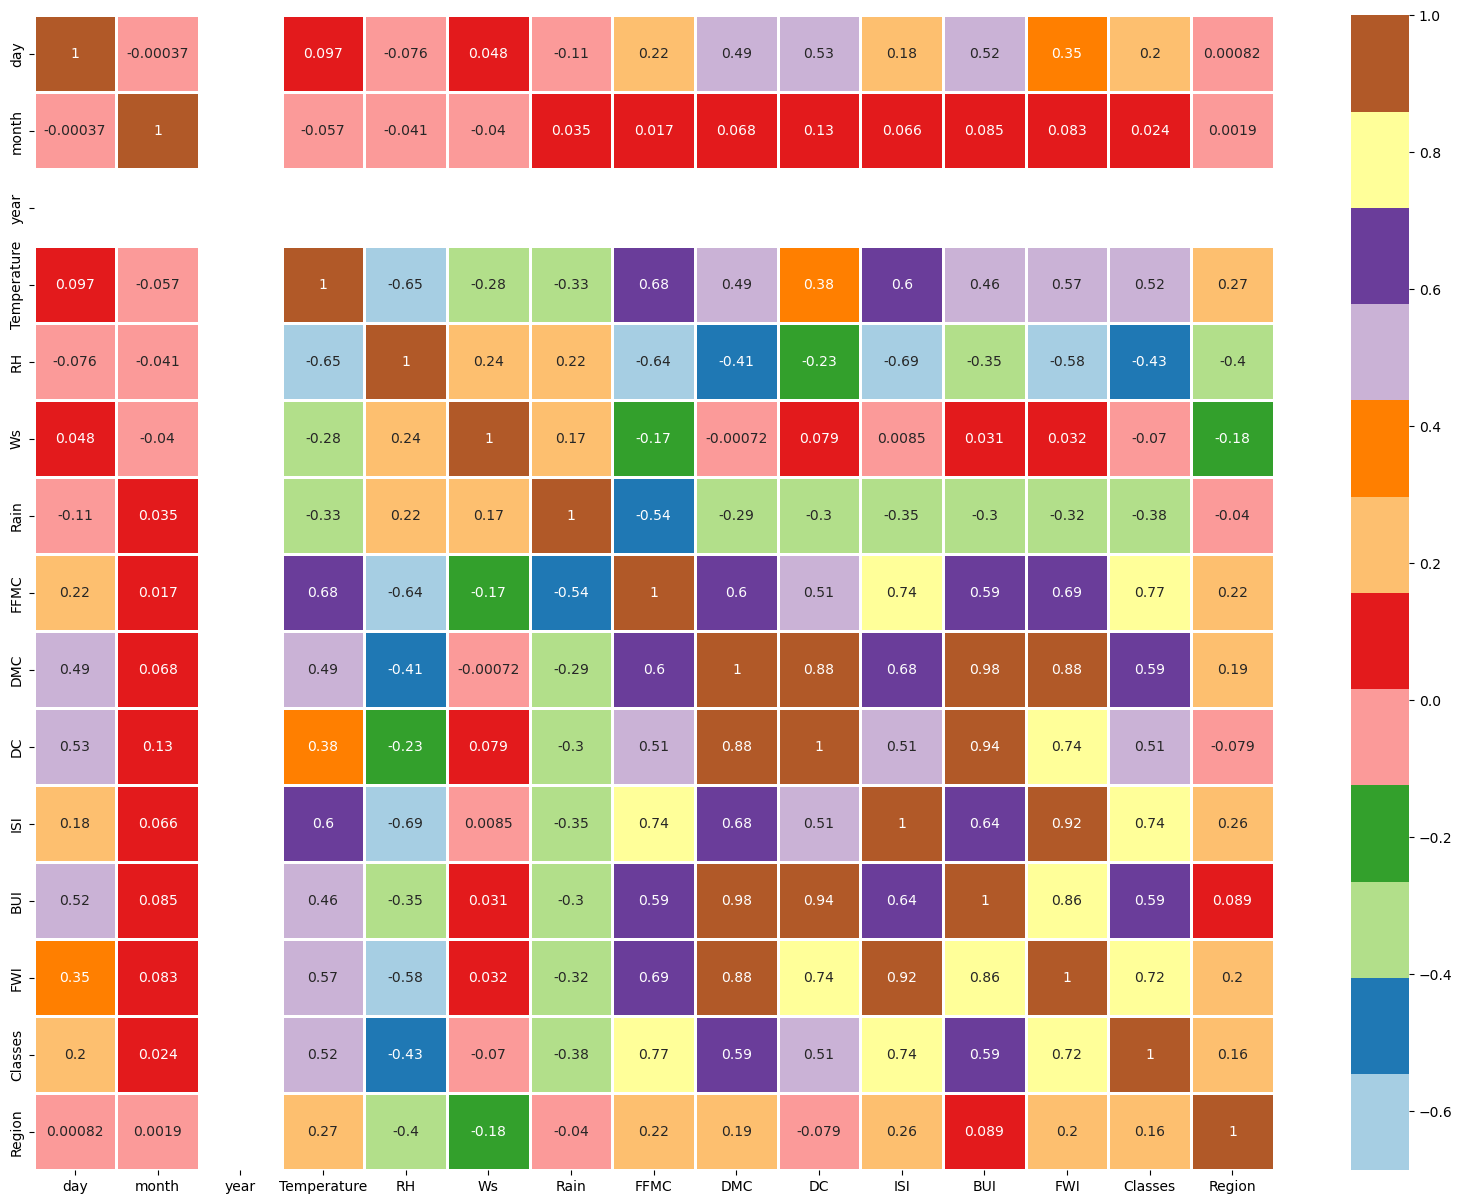

In [36]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot= True, linewidths=1, linecolor="white", cbar=True, cmap = "Paired",xticklabels="auto", yticklabels="auto")

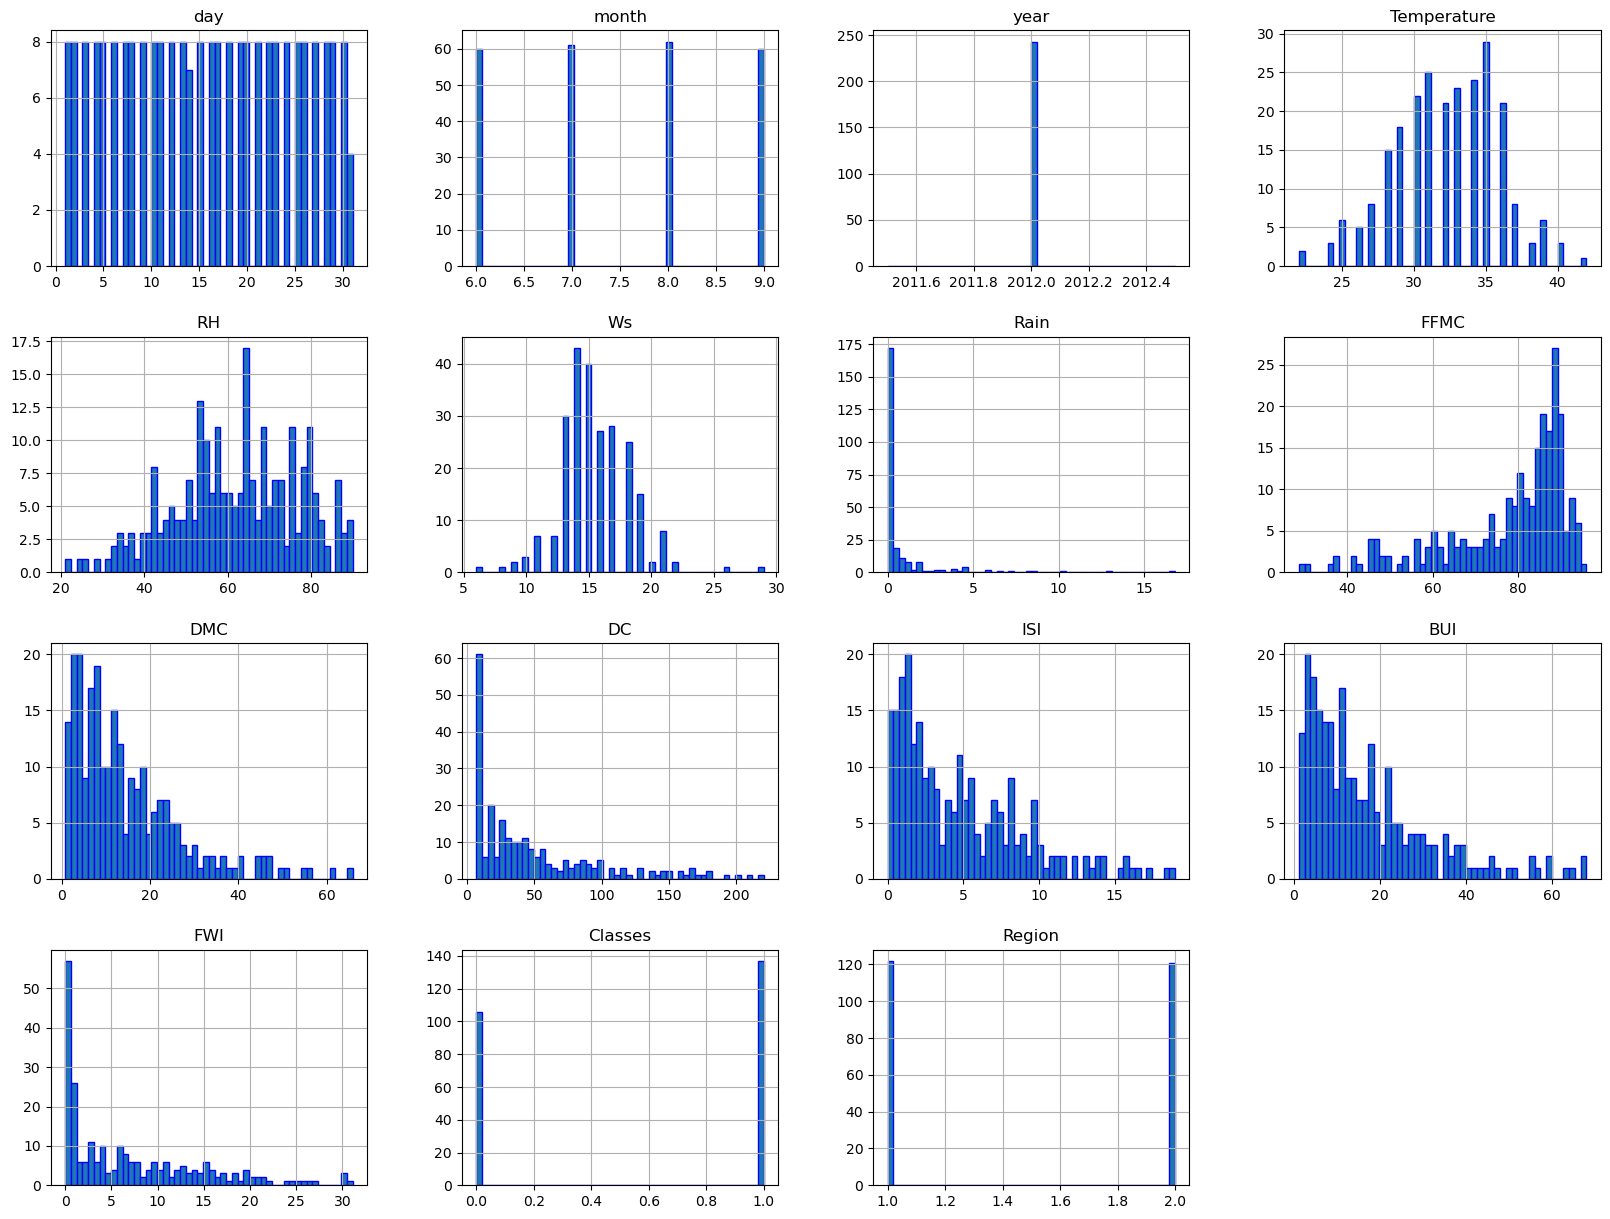

In [37]:
# PLot density plot for all features
df1.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [38]:
# Percentage for PieChart
percentage = df1.Classes.value_counts(normalize=True)*100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n 0: Not Fire || 1: Fire')

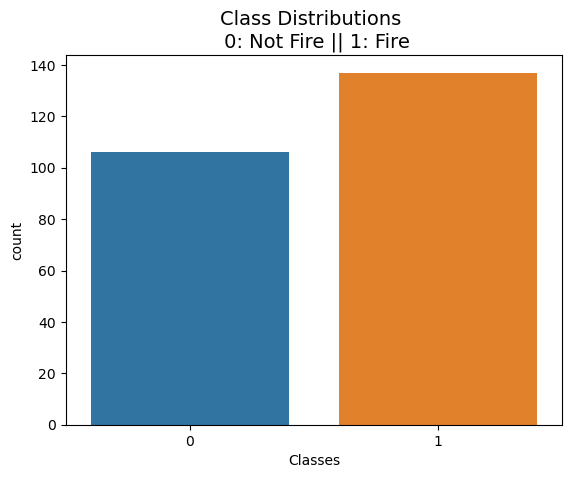

In [39]:
sns.countplot('Classes', data=df1, palette="tab10")
plt.title('Class Distributions \n 0: Not Fire || 1: Fire', fontsize=14)

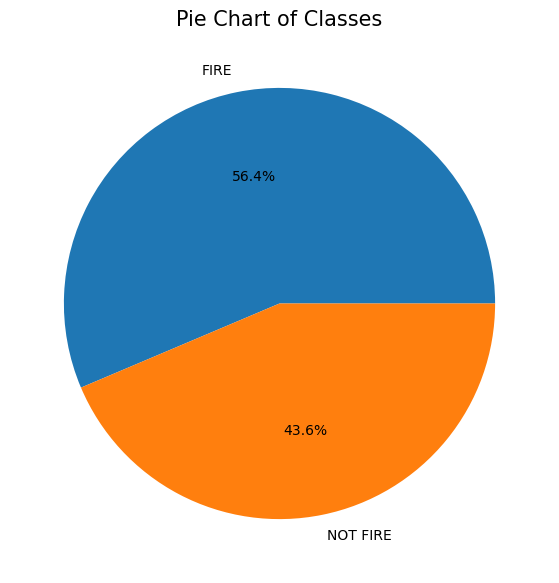

In [40]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show() 

# Monthwise Fire analysis

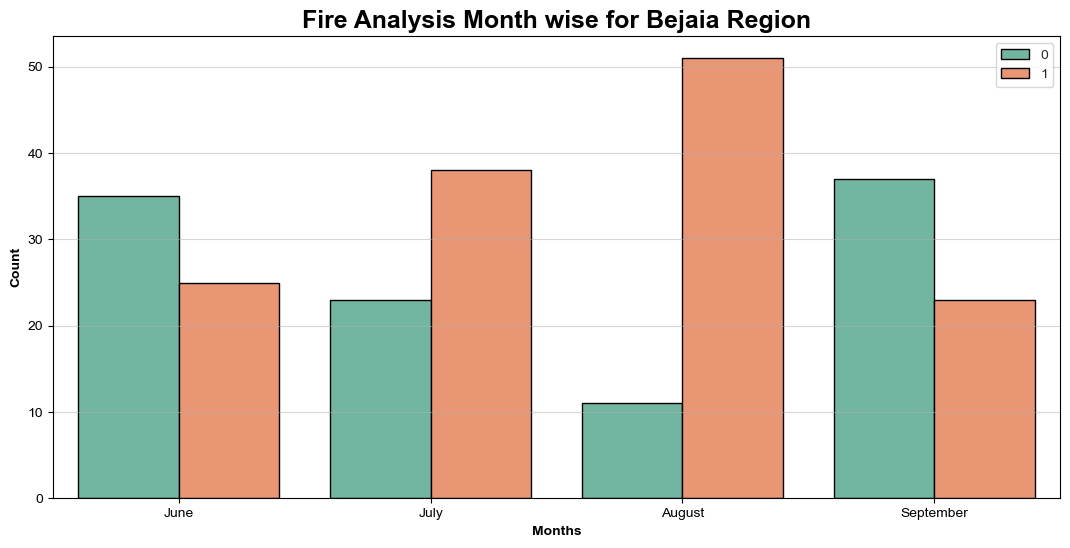

In [41]:
dftemp= df1.loc[df1['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df1,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

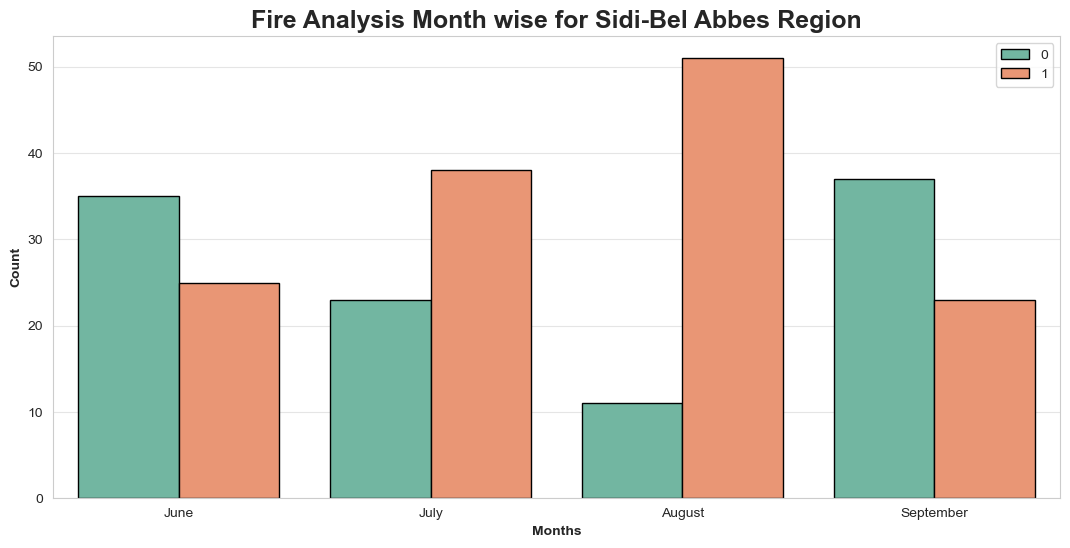

In [42]:
dftemp= df1.loc[df1['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df1,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

# Feature Extraction

In [43]:
#Droping features ['day','month','year'] beacuse it is not important for analysis 
df2 = df1.drop(['day','month','year'], axis=1)
df2.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


In [44]:
X = df2.drop('Classes', axis=1)
y = df2['Classes'] 

In [45]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1


In [46]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int64

# Spliting the dataset into train and test

In [47]:
# Split data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [48]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Region'],
      dtype='object')

In [49]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (194, 11)
Shape of X_test: (49, 11)


In [50]:
# Print dimensions
print(f"Shape of X_train: {X_train.shape}")

# Print column names and count
print(f"Number of features: {len(X_train.columns)}")
print(f"Column names: {X_train.columns.tolist()}")

Shape of X_train: (194, 11)
Number of features: 11
Column names: ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']


# scaling

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

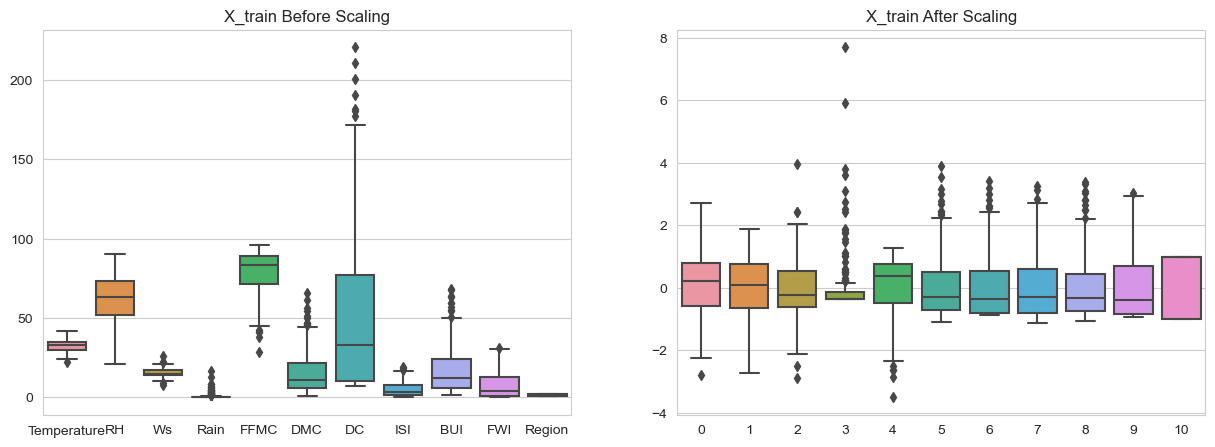

In [52]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# Feature Selection

In [53]:
# Now apply feature selection on the scaled training data
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Transform the test data using the same feature selection
X_test_selected = selector.transform(X_test_scaled)

In [54]:
# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Print the names of the selected features
selected_features = X.columns[selected_indices]
print("Selected features:", selected_features)

Selected features: Index(['FFMC', 'DMC', 'ISI', 'BUI', 'FWI'], dtype='object')


In [55]:
# To ensure the data is aligned
print(f"Shape of X_test: {X_test_selected.shape}")
print(f"Length of y_test: {len(y_test)}")

Shape of X_test: (49, 5)
Length of y_test: 49


In [56]:
print(f"Type of X_test_selected: {type(X_test_selected)}")

Type of X_test_selected: <class 'numpy.ndarray'>


In [57]:
print(f"Type of y_test: {type(y_test)}")

Type of y_test: <class 'pandas.core.series.Series'>


In [58]:
y_test = y_test.to_numpy()

In [59]:
print(f"Type of y_test: {type(y_test)}")

Type of y_test: <class 'numpy.ndarray'>


# Model Implementation

# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg= LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
logreg.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred_logreg = logreg.predict(X_test_selected)

In [61]:
# Assume you want to predict the first sample, for example
sample_index = 22
# Choose the index of the sample you'd like to predict

# Get the features (X_test_selected) for that sample
sample_features = X_test_selected[sample_index]

# Get the actual label (y_test) for that sample
actual_label = y_test[sample_index]

# Get the predicted label for that sample
predicted_label = logreg.predict([sample_features])[0]  

# Print the result
print(f"Sample {sample_index + 1}:")
print(f"Features (X_test): {sample_features}")
print(f"Actual Label: {actual_label}")
print(f"Predicted Label: {predicted_label}")

Sample 23:
Features (X_test): [ 0.68170305 -0.67447946  0.29101999 -0.64160948 -0.19515677]
Actual Label: 1
Predicted Label: 1


In [62]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

y_prob_logreg = logreg.predict_proba(X_test_selected)[:, 1]
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)
print(f"Logistic Regression ROC-AUC: {roc_auc_logreg:.4f}")

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)

Logistic Regression ROC-AUC: 0.9916


In [63]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

print("Accuracy Score:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

Accuracy Score: 0.9591836734693877

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.96      0.96      0.96        27

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49


Confusion Matrix:
 [[21  1]
 [ 1 26]]


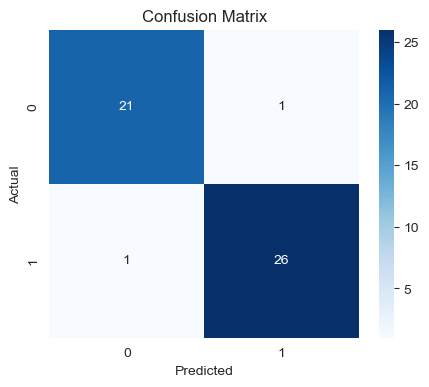

In [64]:
# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree

In [65]:
# Import necessary libraries for Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier
dtree = DecisionTreeClassifier(max_depth=5, 
                               min_samples_split=20,
                               min_samples_leaf=10, 
                               max_features='sqrt', 
                               ccp_alpha=0.01,
                               random_state=42)
dtree.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_dtree = dtree.predict(X_test_selected)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dtree))

# Confusion matrix for Decision Tree
conf_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dtree)

Decision Tree Accuracy: 0.9387755102040817
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.89      0.94        27

    accuracy                           0.94        49
   macro avg       0.94      0.94      0.94        49
weighted avg       0.95      0.94      0.94        49

Confusion Matrix for Decision Tree:
[[22  0]
 [ 3 24]]


In [66]:
# Assume you want to predict the first sample, for example
sample_index = 22  # Choose the index of the sample you'd like to predict

# Get the features (X_test) for that sample
sample_features = X_test_selected[sample_index]

# Get the actual label (y_test) for that sample
actual_label = y_test[sample_index]

# Get the predicted label for that sample
predicted_label = dtree.predict([sample_features])[0]  # Use [sample_features] to make prediction

# Print the result
print(f"Sample {sample_index + 1}:")
print(f"Features (X_test_selected): {sample_features}")
print(f"Actual Label: {actual_label}")
print(f"Predicted Label: {predicted_label}")

Sample 23:
Features (X_test_selected): [ 0.68170305 -0.67447946  0.29101999 -0.64160948 -0.19515677]
Actual Label: 1
Predicted Label: 0


In [67]:
# Get predicted probabilities for the positive class (class 1)
y_prob_tree = dtree.predict_proba(X_test_selected)[:, 1]

# Calculate ROC-AUC score
roc_auc_tree = roc_auc_score(y_test, y_prob_tree)
print(f"Decision Tree ROC-AUC: {roc_auc_tree:.4f}")

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)

Decision Tree ROC-AUC: 0.9621


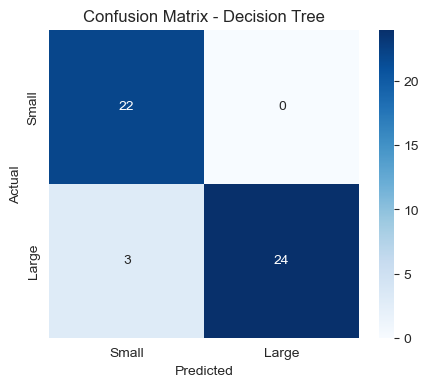

In [68]:
# Plot the confusion matrix for decision tree
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_dtree, annot=True, fmt='d', cmap='Blues', xticklabels=['Small', 'Large'], yticklabels=['Small', 'Large'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Support Vector Machine

In [69]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)
svm_clf.fit(X_train_selected, y_train)

y_pred_svm = svm_clf.predict(X_test_selected)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for SVM:")
print(conf_matrix_svm)

SVM Accuracy: 0.9591836734693877
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.96      0.96      0.96        27

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49

Confusion Matrix for SVM:
[[21  1]
 [ 1 26]]


In [70]:
# Assume you want to predict the first sample, for example
sample_index = 22  # Choose the index of the sample you'd like to predict

# Get the features (X_test) for that sample
sample_features = X_test_selected[sample_index]

# Get the actual label (y_test) for that sample
actual_label = y_test[sample_index]

# Get the predicted label for that sample
predicted_label = svm_clf.predict([sample_features])[0]  # Use [sample_features] to make prediction

# Print the result
print(f"Sample {sample_index + 1}:")
print(f"Features (X_test_selected): {sample_features}")
print(f"Actual Label: {actual_label}")
print(f"Predicted Label: {predicted_label}")

Sample 23:
Features (X_test_selected): [ 0.68170305 -0.67447946  0.29101999 -0.64160948 -0.19515677]
Actual Label: 1
Predicted Label: 1


In [71]:
# Get predicted probabilities for the positive class (class 1)
y_prob_svc = svm_clf.predict_proba(X_test_selected)[:, 1]

# Calculate ROC-AUC score
roc_auc_svc = roc_auc_score(y_test, y_prob_svc)
print(f"SVC ROC-AUC: {roc_auc_svc:.4f}")

fpr_svc, tpr_svc, _ = roc_curve(y_test, y_prob_svc)

SVC ROC-AUC: 0.9916


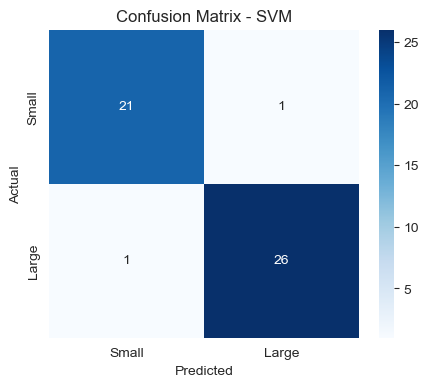

In [72]:
# Plot confusion matrix for SVM
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Small', 'Large'], yticklabels=['Small', 'Large'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# K-Nearest Neighbors 

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_selected, y_train)

y_pred_knn = knn.predict(X_test_selected)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion matrix for K-Neighbors Classifier
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN:")
print(conf_matrix_knn)

Accuracy: 0.9591836734693877

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.96      0.96      0.96        27

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49

Confusion Matrix for KNN:
[[21  1]
 [ 1 26]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [75]:
# Assume you want to predict the first sample, for example
sample_index = 22  # Choose the index of the sample you'd like to predict

# Get the features (X_test) for that sample
sample_features = X_test_selected[sample_index]

# Get the actual label (y_test) for that sample
actual_label = y_test[sample_index]

# Get the predicted label for that sample
predicted_label = knn.predict([sample_features])[0]  # Use [sample_features] to make prediction

# Print the result
print(f"Sample {sample_index + 1}:")
print(f"Features (X_test_selected): {sample_features}")
print(f"Actual Label: {actual_label}")
print(f"Predicted Label: {predicted_label}")


Sample 23:
Features (X_test_selected): [ 0.68170305 -0.67447946  0.29101999 -0.64160948 -0.19515677]
Actual Label: 1
Predicted Label: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [76]:
# Get predicted probabilities for the positive class (class 1)
y_prob_knn = knn.predict_proba(X_test_selected)[:, 1]

# Calculate ROC-AUC score
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
print(f"KNN ROC-AUC: {roc_auc_knn:.4f}")

# Compute the ROC curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

KNN ROC-AUC: 0.9916


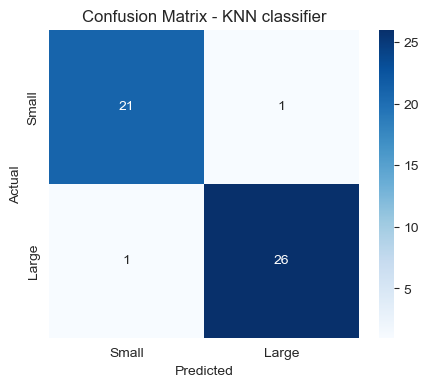

In [77]:
# Plot confusion matrix for KNN
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Small', 'Large'], yticklabels=['Small', 'Large'])
plt.title('Confusion Matrix - KNN classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

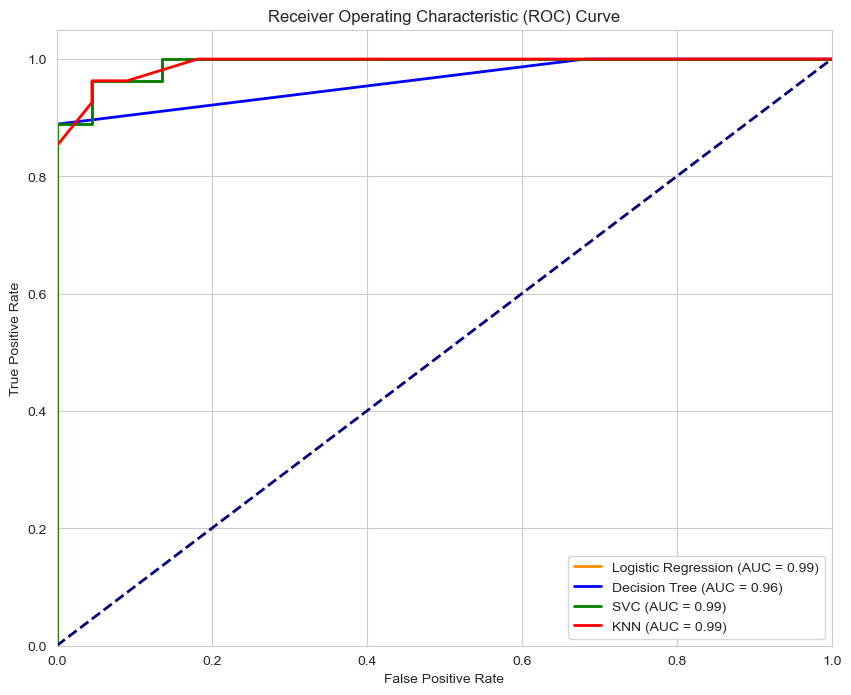

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

# Logistic Regression ROC Curve
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')

# Decision Tree ROC Curve
plt.plot(fpr_tree, tpr_tree, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')

# SVC ROC Curve
plt.plot(fpr_svc, tpr_svc, color='green', lw=2, label=f'SVC (AUC = {roc_auc_svc:.2f})')

# KNN ROC curve
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')

# Plot random classifier (diagonal line)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Show the plot
plt.show()

# Comparision of models in Bar graph

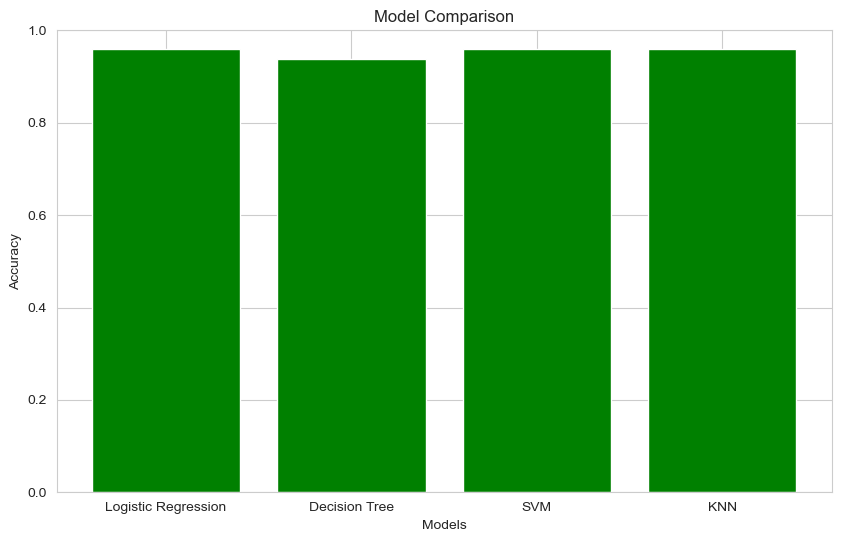

In [80]:
# Model names
models = ['Logistic Regression', 'Decision Tree', 'SVM', 'KNN']

# Model performance metrics (for example, accuracy)
accuracy = [0.959183, 0.938775, 0.959183 , 0.959183]  # Example accuracy values for each model

# Bar graph configuration
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color='green')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)  # Scale the y-axis from 0 to 1 for accuracy
plt.show()